# Clase Práctica 05

# Neural Network - Redes Neuronales Artificiales


# Regresión de los precios de las viviendas de Boston


El problema que veremos en esta clase práctica utiliza la base de datos del precio de viviendas de Boston. La base de datos describe las propiedades y características de las casas en los suburbios de Boston y se ocupa de modelar el precio de las casas (en miles de dólares). Este es un problema de modelación predictiva de regresión ya que nos interesa predecir el valor de una vivienda dada un set de características. Hay 13 variables de entrada que describen las propiedades de un suburbio de Boston determinado.

La lista completa de atributos en este conjunto de datos es la siguiente:

1. CRIM: tasa de criminalidad per cápita por ciudad.
2. ZN: proporción de tierra residencial zonificada para lotes de más de 25,000 pies cuadrados.
3. INDUS: proporción de acres de negocios no minoristas por ciudad.
4. CHAS: variable ficticia del río Charles (= 1 si el trecho delimita el río; 0 de lo contrario).
5. NOX: concentración de óxidos nítricos (partes por 10 millones).
6. RM: número medio de habitaciones por vivienda.
7. EDAD: proporción de unidades ocupadas por el propietario construidas antes de 1940.
8. DIS: distancias ponderadas para los centros de empleo de Boston.
9. RAD: índice de accesibilidad a autopistas radiales.
10. IMPUESTO: tasa de impuesto a la propiedad de valor total por 10,000 dolares.
11. PTRATIO: proporción alumno-profesor por ciudad.
12. B: 1000 (Bk - 0:63)^2 donde Bk es la proporción de negros por ciudad.
13. LSTAT:% menor estado de la población.
14. MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dolares.

Es conveniente trabajar con esta base de datos porque los atributos de entrada y salida son numéricos y hay 506 instancias con las que trabajar. A continuación se muestran ejemplos de las primeras 5 filas de 506 instancias que corresponde al total de datos:

0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00

0.02731 0.00 7.070 0 0.4690 6.4210 78.90 4.9671 2 242.0 17.80 396.90 9.14 21.60

0.02729 0.00 7.070 0 0.4690 7.1850 61.10 4.9671 2 242.0 17.80 392.83 4.03 34.70

0.03237 0.00 2.180 0 0.4580 6.9980 45.80 6.0622 3 222.0 18.70 394.63 2.94 33.40

0.06905 0.00 2.180 0 0.4580 7.1470 54.20 6.0622 3 222.0 18.70 396.90 5.33 36.20


# Desarrollo del modelo

Utilizaremos una función de keras para descargar y luego cargar la base de datos para realizar nuestro problema de regresión.

In [6]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() # llamar a la función para los datos 

print(train_data.shape)    # forma de los datos de entrenamiento
print(test_data.shape)     # forma de los datos de test
print(train_targets)       # forma de las etiquetas, targets o objetivo para problema de regresión

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

Es posible observar 102 ejemplos para test con 13 atributos numéricos. Los precios de las viviendas están en un rango de 10.000 hasta 50.000 dolares. 

# Preparación de los datos 

Siempre es necesario procesar los datos ya que en nuestra base de datos hay valores con rangos muy diferentes. La red debe ser capaz de adaptarse a esos datos, pero podría ser dificil sin procesamiento de los datos. Es conveniente realizar una normalización de los datos, es decir a cada característica de los datos de entrada (cada columna de la matriz de datos de entrada) se le sustrae la media de la característica y se divide por la desviación estándar. De esta manera la característica queda centrada en 0 y con una desviación estándar igual a 1. Esto puede ser realizado con Numpy. 

In [ ]:
mean = train_data.mean(axis=0)    # media de los datos de entrenamiento
train_data -= mean                # restar la media a los datos de entrenamiento
std = train_data.std(axis=0)      # desviación estándar de los datos de entrenamiento
train_data /= std                 # restar la desviación a los datos de train 

test_data -= mean                 # restar la media a los datos de test
test_data /= std                  # restar la desviación a los datos de test

Note que se han normalizado los datos usando solo los datos de entrenamiento (train_data). Nunca se deben usar los datos de prueba para realizar los cálculos, incluso para la normalización de datos.

# Modelo de red neuronal 

Como son pocos ejemplos, se utilizará una pequeña red neuronal con 2 capas ocultas y 64 unidades. Cuando hay pocos datos para entrenamiento existirá sobre-ajuste (overfitting) de los datos, y usando una red pequeña es posible mitigarlo. 

In [8]:
from keras import models
from keras import layers

def modelo_regresion():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

La red terminará con una sola capa y sin función de activación (solo salida lineal). Esta es una configuración típica en regresión escalar (queremos predecir solo un valor continuo). La red es capaz de predecir cualquier valor en cualquier rango. 

La red se compila usando una pérdida mse, la diferencia cuadrada entre la predición y el objetivo (targets), la cual es la más usada en problemas de regresión. 

Además, se monitorea una nueva métrica llamada MAE (mean absolute error) en el entrenamiento. Esta métrica corresponde al valor absoluto de las diferencias entre la predicción y el objetivo (targets). Un MAE de 0.5 significa que estamos sobre $500 en promedio. 

# Validación con K-fold

Como existen pocas instancias en nuestra base de datos, se utilizará k-fold. Recordar que k-fold divide la base de datos en k particiones, creando k modelos identicos y entrenando cada uno con k-1 particiones y validando con las particiones restantes. 

In [9]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


for i in range(k):
    print('Carpeta a procesar #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    
    model = modelo_regresion()
    
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    all_scores.append(val_mae)


Carpeta a procesar Nº # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Carpeta a procesar Nº # 1
Carpeta a procesar Nº # 2
Carpeta a procesar Nº # 3


In [10]:
print(all_scores)
print(np.mean(all_scores))

[3.0544113853190207, 3.3459768814615685, 3.914209790749125, 3.271706774683282]
3.396576208053249


En este caso, estamos sobre los 3.300 dolares en promedio, lo cual es significativo teniendo en cuenta que los precios oscilan entre 10.000 y 50.000 dolares.

Entrenemos otra red con un poco más de épocas (500). Ahora vamos a guardar lo que hace el modelo en cada época con la historia.  

In [12]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('Carpeta a procesar #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    
    model = modelo_regresion()
    
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

# generando la historia para los k fold

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Carpeta a procesar # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 2s 5ms/step - loss: 229.7449 - mean_absolute_error: 10.2921 - val_loss: 178.9107 - val_mean_absolute_error: 10.3938
Epoch 2/500
303/303 [==============================] - 1s 4ms/step - loss: 140.2460 - mean_absolute_error: 8.8306 - val_loss: 104.2922 - val_mean_absolute_error: 8.9691
Epoch 3/500
303/303 [==============================] - 1s 4ms/step - loss: 102.3911 - mean_absolute_error: 7.6701 - val_loss: 62.7664 - val_mean_absolute_error: 5.3805
Epoch 4/500
303/303 [==============================] - 1s 4ms/step - loss: 96.5550 - mean_absolute_error: 7.4391 - val_loss: 86.6926 - val_mean_absolute_error: 6.3942
Epoch 5/500
303/303 [==============================] - 1s 4ms/step - loss: 75.0061 - mean_absolute_error: 6.4672 - val_loss: 61.3157 - val_mean_absolute_error: 5.8850
Epoch 6/500
303/303 [==============================] - 1s 4ms/step - loss: 72.3888 - mean

Epoch 98/500
303/303 [==============================] - 1s 4ms/step - loss: 18.3956 - mean_absolute_error: 2.8723 - val_loss: 14.5682 - val_mean_absolute_error: 3.0974
Epoch 99/500
303/303 [==============================] - 1s 4ms/step - loss: 17.5968 - mean_absolute_error: 2.9520 - val_loss: 13.3313 - val_mean_absolute_error: 2.7000
Epoch 100/500
303/303 [==============================] - 1s 4ms/step - loss: 15.1623 - mean_absolute_error: 2.8333 - val_loss: 21.1723 - val_mean_absolute_error: 3.4190
Epoch 101/500
303/303 [==============================] - 1s 4ms/step - loss: 17.5879 - mean_absolute_error: 2.9763 - val_loss: 16.8301 - val_mean_absolute_error: 3.0484
Epoch 102/500
303/303 [==============================] - 1s 4ms/step - loss: 18.0551 - mean_absolute_error: 3.0334 - val_loss: 13.3551 - val_mean_absolute_error: 2.5572
Epoch 103/500
303/303 [==============================] - 1s 4ms/step - loss: 17.3089 - mean_absolute_error: 3.0177 - val_loss: 11.2160 - val_mean_absolute_er

303/303 [==============================] - 1s 4ms/step - loss: 15.0643 - mean_absolute_error: 2.7484 - val_loss: 12.9344 - val_mean_absolute_error: 2.6952
Epoch 195/500
303/303 [==============================] - 1s 4ms/step - loss: 15.9763 - mean_absolute_error: 2.7013 - val_loss: 11.8398 - val_mean_absolute_error: 2.5625
Epoch 196/500
303/303 [==============================] - 1s 4ms/step - loss: 14.8240 - mean_absolute_error: 2.7198 - val_loss: 12.7074 - val_mean_absolute_error: 2.5405
Epoch 197/500
303/303 [==============================] - 1s 4ms/step - loss: 15.6421 - mean_absolute_error: 2.7396 - val_loss: 14.4669 - val_mean_absolute_error: 2.8621
Epoch 198/500
303/303 [==============================] - 1s 4ms/step - loss: 14.2542 - mean_absolute_error: 2.5942 - val_loss: 15.2577 - val_mean_absolute_error: 2.7723
Epoch 199/500
303/303 [==============================] - 1s 4ms/step - loss: 14.6604 - mean_absolute_error: 2.6729 - val_loss: 13.8788 - val_mean_absolute_error: 3.0004


303/303 [==============================] - 1s 4ms/step - loss: 13.5098 - mean_absolute_error: 2.5723 - val_loss: 17.0647 - val_mean_absolute_error: 3.1963
Epoch 291/500
303/303 [==============================] - 1s 4ms/step - loss: 11.0355 - mean_absolute_error: 2.4779 - val_loss: 14.2704 - val_mean_absolute_error: 2.7913
Epoch 292/500
303/303 [==============================] - 1s 4ms/step - loss: 14.2200 - mean_absolute_error: 2.4987 - val_loss: 20.6902 - val_mean_absolute_error: 3.1853
Epoch 293/500
303/303 [==============================] - 1s 4ms/step - loss: 14.2979 - mean_absolute_error: 2.5731 - val_loss: 15.3555 - val_mean_absolute_error: 2.8760
Epoch 294/500
303/303 [==============================] - 1s 4ms/step - loss: 14.1685 - mean_absolute_error: 2.6367 - val_loss: 19.9917 - val_mean_absolute_error: 3.4513
Epoch 295/500
303/303 [==============================] - 1s 4ms/step - loss: 14.2007 - mean_absolute_error: 2.5860 - val_loss: 13.0238 - val_mean_absolute_error: 2.7273


303/303 [==============================] - 1s 4ms/step - loss: 12.5381 - mean_absolute_error: 2.5103 - val_loss: 20.4780 - val_mean_absolute_error: 3.8282
Epoch 387/500
303/303 [==============================] - 1s 4ms/step - loss: 11.9411 - mean_absolute_error: 2.3771 - val_loss: 17.7006 - val_mean_absolute_error: 2.9626
Epoch 388/500
303/303 [==============================] - 1s 4ms/step - loss: 12.2917 - mean_absolute_error: 2.4628 - val_loss: 21.4573 - val_mean_absolute_error: 3.5911
Epoch 389/500
303/303 [==============================] - 1s 4ms/step - loss: 12.7586 - mean_absolute_error: 2.4352 - val_loss: 19.7839 - val_mean_absolute_error: 3.2505
Epoch 390/500
303/303 [==============================] - 1s 4ms/step - loss: 12.5099 - mean_absolute_error: 2.4362 - val_loss: 16.8407 - val_mean_absolute_error: 2.9091
Epoch 391/500
303/303 [==============================] - 1s 4ms/step - loss: 12.8909 - mean_absolute_error: 2.4430 - val_loss: 13.9663 - val_mean_absolute_error: 2.8007


303/303 [==============================] - 1s 4ms/step - loss: 11.6308 - mean_absolute_error: 2.3690 - val_loss: 15.2981 - val_mean_absolute_error: 3.0864
Epoch 483/500
303/303 [==============================] - 1s 4ms/step - loss: 11.1067 - mean_absolute_error: 2.3116 - val_loss: 14.8534 - val_mean_absolute_error: 2.7895
Epoch 484/500
303/303 [==============================] - 1s 4ms/step - loss: 11.8670 - mean_absolute_error: 2.3985 - val_loss: 15.3035 - val_mean_absolute_error: 2.8742
Epoch 485/500
303/303 [==============================] - 1s 4ms/step - loss: 12.0646 - mean_absolute_error: 2.4271 - val_loss: 13.9986 - val_mean_absolute_error: 2.7407
Epoch 486/500
303/303 [==============================] - 1s 4ms/step - loss: 12.2088 - mean_absolute_error: 2.4136 - val_loss: 17.7354 - val_mean_absolute_error: 3.2810
Epoch 487/500
303/303 [==============================] - 1s 4ms/step - loss: 10.7182 - mean_absolute_error: 2.3445 - val_loss: 13.8302 - val_mean_absolute_error: 2.7992


Epoch 79/500
303/303 [==============================] - 1s 4ms/step - loss: 15.9577 - mean_absolute_error: 2.8781 - val_loss: 46.7865 - val_mean_absolute_error: 5.3180
Epoch 80/500
303/303 [==============================] - 1s 4ms/step - loss: 17.9034 - mean_absolute_error: 3.0519 - val_loss: 16.9095 - val_mean_absolute_error: 3.0781
Epoch 81/500
303/303 [==============================] - 1s 4ms/step - loss: 17.9112 - mean_absolute_error: 2.9638 - val_loss: 16.9062 - val_mean_absolute_error: 3.0423
Epoch 82/500
303/303 [==============================] - 1s 4ms/step - loss: 16.8572 - mean_absolute_error: 2.9746 - val_loss: 14.1021 - val_mean_absolute_error: 2.7799
Epoch 83/500
303/303 [==============================] - 1s 4ms/step - loss: 19.5134 - mean_absolute_error: 2.9850 - val_loss: 14.2609 - val_mean_absolute_error: 2.8312
Epoch 84/500
303/303 [==============================] - 1s 4ms/step - loss: 16.1286 - mean_absolute_error: 2.8801 - val_loss: 32.9594 - val_mean_absolute_error:

303/303 [==============================] - 1s 4ms/step - loss: 14.1306 - mean_absolute_error: 2.7970 - val_loss: 17.3728 - val_mean_absolute_error: 3.4018
Epoch 176/500
303/303 [==============================] - 1s 4ms/step - loss: 15.8305 - mean_absolute_error: 2.7878 - val_loss: 14.9166 - val_mean_absolute_error: 2.9403
Epoch 177/500
303/303 [==============================] - 1s 4ms/step - loss: 17.0861 - mean_absolute_error: 2.8808 - val_loss: 12.7493 - val_mean_absolute_error: 2.6955
Epoch 178/500
303/303 [==============================] - 1s 4ms/step - loss: 14.6010 - mean_absolute_error: 2.7858 - val_loss: 15.8494 - val_mean_absolute_error: 2.8513
Epoch 179/500
303/303 [==============================] - 1s 4ms/step - loss: 15.5546 - mean_absolute_error: 2.7953 - val_loss: 15.0935 - val_mean_absolute_error: 2.8324
Epoch 180/500
303/303 [==============================] - 1s 4ms/step - loss: 15.4165 - mean_absolute_error: 2.7894 - val_loss: 19.6549 - val_mean_absolute_error: 3.1553


303/303 [==============================] - 1s 4ms/step - loss: 14.6274 - mean_absolute_error: 2.6428 - val_loss: 11.7308 - val_mean_absolute_error: 2.6027
Epoch 272/500
303/303 [==============================] - 1s 4ms/step - loss: 14.5184 - mean_absolute_error: 2.5905 - val_loss: 14.6966 - val_mean_absolute_error: 2.8755
Epoch 273/500
303/303 [==============================] - 1s 4ms/step - loss: 12.8112 - mean_absolute_error: 2.5799 - val_loss: 18.4169 - val_mean_absolute_error: 3.0650
Epoch 274/500
303/303 [==============================] - 1s 4ms/step - loss: 14.9149 - mean_absolute_error: 2.7373 - val_loss: 14.3640 - val_mean_absolute_error: 2.8671
Epoch 275/500
303/303 [==============================] - 1s 4ms/step - loss: 14.7093 - mean_absolute_error: 2.5981 - val_loss: 13.1059 - val_mean_absolute_error: 2.7702
Epoch 276/500
303/303 [==============================] - 1s 4ms/step - loss: 13.3322 - mean_absolute_error: 2.5830 - val_loss: 16.3949 - val_mean_absolute_error: 2.8792


303/303 [==============================] - 1s 4ms/step - loss: 11.5051 - mean_absolute_error: 2.4171 - val_loss: 13.6201 - val_mean_absolute_error: 2.7851
Epoch 368/500
303/303 [==============================] - 1s 4ms/step - loss: 12.5648 - mean_absolute_error: 2.4412 - val_loss: 12.8350 - val_mean_absolute_error: 2.7160
Epoch 369/500
303/303 [==============================] - 1s 4ms/step - loss: 12.5304 - mean_absolute_error: 2.4300 - val_loss: 12.2727 - val_mean_absolute_error: 2.5115
Epoch 370/500
303/303 [==============================] - 1s 4ms/step - loss: 11.4592 - mean_absolute_error: 2.3935 - val_loss: 12.0741 - val_mean_absolute_error: 2.5777
Epoch 371/500
303/303 [==============================] - 1s 4ms/step - loss: 11.9802 - mean_absolute_error: 2.3345 - val_loss: 14.4049 - val_mean_absolute_error: 2.8725
Epoch 372/500
303/303 [==============================] - 1s 4ms/step - loss: 13.5483 - mean_absolute_error: 2.5931 - val_loss: 14.4819 - val_mean_absolute_error: 2.6774


303/303 [==============================] - 1s 4ms/step - loss: 11.2977 - mean_absolute_error: 2.3469 - val_loss: 13.9108 - val_mean_absolute_error: 2.7206
Epoch 464/500
303/303 [==============================] - 2s 5ms/step - loss: 10.4545 - mean_absolute_error: 2.3366 - val_loss: 15.1855 - val_mean_absolute_error: 3.0528
Epoch 465/500
303/303 [==============================] - 1s 4ms/step - loss: 9.5543 - mean_absolute_error: 2.3337 - val_loss: 14.6791 - val_mean_absolute_error: 2.9850
Epoch 466/500
303/303 [==============================] - 1s 4ms/step - loss: 11.7630 - mean_absolute_error: 2.3748 - val_loss: 13.6307 - val_mean_absolute_error: 2.7443
Epoch 467/500
303/303 [==============================] - 1s 4ms/step - loss: 11.0547 - mean_absolute_error: 2.3447 - val_loss: 14.3519 - val_mean_absolute_error: 2.6741
Epoch 468/500
303/303 [==============================] - 1s 4ms/step - loss: 12.2692 - mean_absolute_error: 2.4262 - val_loss: 11.5151 - val_mean_absolute_error: 2.4600
E

Epoch 60/500
303/303 [==============================] - 1s 4ms/step - loss: 19.8831 - mean_absolute_error: 3.1818 - val_loss: 17.2942 - val_mean_absolute_error: 3.0833
Epoch 61/500
303/303 [==============================] - 1s 4ms/step - loss: 18.0528 - mean_absolute_error: 3.1164 - val_loss: 18.6114 - val_mean_absolute_error: 2.9439
Epoch 62/500
303/303 [==============================] - 1s 4ms/step - loss: 16.7464 - mean_absolute_error: 2.9544 - val_loss: 24.4851 - val_mean_absolute_error: 3.3127
Epoch 63/500
303/303 [==============================] - 1s 4ms/step - loss: 18.3350 - mean_absolute_error: 3.0944 - val_loss: 20.4429 - val_mean_absolute_error: 3.1120
Epoch 64/500
303/303 [==============================] - 1s 4ms/step - loss: 18.2602 - mean_absolute_error: 3.0587 - val_loss: 19.5658 - val_mean_absolute_error: 2.9937
Epoch 65/500
303/303 [==============================] - 1s 4ms/step - loss: 17.8335 - mean_absolute_error: 3.0974 - val_loss: 19.5744 - val_mean_absolute_error:

Epoch 109/500
303/303 [==============================] - 1s 4ms/step - loss: 15.1893 - mean_absolute_error: 2.6670 - val_loss: 23.1527 - val_mean_absolute_error: 3.2573
Epoch 110/500
303/303 [==============================] - 1s 4ms/step - loss: 15.2887 - mean_absolute_error: 2.7497 - val_loss: 26.0158 - val_mean_absolute_error: 3.7072
Epoch 111/500
303/303 [==============================] - 1s 4ms/step - loss: 15.6898 - mean_absolute_error: 2.7374 - val_loss: 16.6201 - val_mean_absolute_error: 2.8836
Epoch 112/500
303/303 [==============================] - 1s 4ms/step - loss: 13.5535 - mean_absolute_error: 2.6705 - val_loss: 28.3764 - val_mean_absolute_error: 3.6125
Epoch 113/500
303/303 [==============================] - 1s 5ms/step - loss: 15.7182 - mean_absolute_error: 2.8336 - val_loss: 23.6536 - val_mean_absolute_error: 3.3323
Epoch 114/500
303/303 [==============================] - 1s 4ms/step - loss: 15.6378 - mean_absolute_error: 2.8207 - val_loss: 18.9018 - val_mean_absolute_

303/303 [==============================] - 1s 4ms/step - loss: 12.8196 - mean_absolute_error: 2.5725 - val_loss: 19.9285 - val_mean_absolute_error: 3.5306
Epoch 206/500
303/303 [==============================] - 1s 4ms/step - loss: 13.8856 - mean_absolute_error: 2.5666 - val_loss: 35.3306 - val_mean_absolute_error: 4.0757
Epoch 207/500
303/303 [==============================] - 1s 4ms/step - loss: 14.2332 - mean_absolute_error: 2.6526 - val_loss: 17.6311 - val_mean_absolute_error: 3.1059
Epoch 208/500
303/303 [==============================] - 1s 4ms/step - loss: 13.7619 - mean_absolute_error: 2.5877 - val_loss: 20.5301 - val_mean_absolute_error: 3.2828
Epoch 209/500
303/303 [==============================] - 1s 4ms/step - loss: 12.5918 - mean_absolute_error: 2.5062 - val_loss: 19.4281 - val_mean_absolute_error: 2.9480
Epoch 210/500
303/303 [==============================] - 1s 4ms/step - loss: 12.8951 - mean_absolute_error: 2.5053 - val_loss: 16.9387 - val_mean_absolute_error: 2.9438


303/303 [==============================] - 1s 4ms/step - loss: 11.3982 - mean_absolute_error: 2.3769 - val_loss: 16.0844 - val_mean_absolute_error: 2.9124
Epoch 302/500
303/303 [==============================] - 1s 4ms/step - loss: 11.2515 - mean_absolute_error: 2.3591 - val_loss: 23.1568 - val_mean_absolute_error: 3.3953
Epoch 303/500
303/303 [==============================] - 1s 4ms/step - loss: 10.8758 - mean_absolute_error: 2.3672 - val_loss: 14.9909 - val_mean_absolute_error: 2.6585
Epoch 304/500
303/303 [==============================] - 1s 4ms/step - loss: 11.7684 - mean_absolute_error: 2.3958 - val_loss: 15.9102 - val_mean_absolute_error: 2.9494
Epoch 305/500
303/303 [==============================] - 1s 4ms/step - loss: 10.7512 - mean_absolute_error: 2.3839 - val_loss: 20.3183 - val_mean_absolute_error: 2.9847
Epoch 306/500
303/303 [==============================] - 1s 4ms/step - loss: 11.9121 - mean_absolute_error: 2.4359 - val_loss: 20.7722 - val_mean_absolute_error: 3.1028


303/303 [==============================] - 1s 4ms/step - loss: 11.2976 - mean_absolute_error: 2.3565 - val_loss: 16.6980 - val_mean_absolute_error: 2.8646
Epoch 398/500
303/303 [==============================] - 1s 4ms/step - loss: 10.9222 - mean_absolute_error: 2.3223 - val_loss: 18.5674 - val_mean_absolute_error: 3.3211
Epoch 399/500
303/303 [==============================] - 1s 4ms/step - loss: 10.5444 - mean_absolute_error: 2.3660 - val_loss: 18.6739 - val_mean_absolute_error: 2.9238
Epoch 400/500
303/303 [==============================] - 1s 4ms/step - loss: 10.6895 - mean_absolute_error: 2.4073 - val_loss: 16.0603 - val_mean_absolute_error: 2.8929
Epoch 401/500
303/303 [==============================] - 1s 4ms/step - loss: 10.5582 - mean_absolute_error: 2.2898 - val_loss: 20.5945 - val_mean_absolute_error: 3.0422
Epoch 402/500
303/303 [==============================] - 1s 4ms/step - loss: 11.5926 - mean_absolute_error: 2.3938 - val_loss: 15.1161 - val_mean_absolute_error: 2.8842


Epoch 494/500
303/303 [==============================] - 1s 4ms/step - loss: 10.2251 - mean_absolute_error: 2.2906 - val_loss: 20.3908 - val_mean_absolute_error: 2.9616
Epoch 495/500
303/303 [==============================] - 1s 4ms/step - loss: 10.1214 - mean_absolute_error: 2.1957 - val_loss: 15.5596 - val_mean_absolute_error: 2.8722
Epoch 496/500
303/303 [==============================] - 1s 4ms/step - loss: 10.4565 - mean_absolute_error: 2.2321 - val_loss: 17.7374 - val_mean_absolute_error: 2.7562
Epoch 497/500
303/303 [==============================] - 1s 4ms/step - loss: 9.7898 - mean_absolute_error: 2.2799 - val_loss: 13.2677 - val_mean_absolute_error: 2.6739
Epoch 498/500
303/303 [==============================] - 1s 4ms/step - loss: 9.6617 - mean_absolute_error: 2.2280 - val_loss: 16.5831 - val_mean_absolute_error: 2.9397
Epoch 499/500
303/303 [==============================] - 1s 4ms/step - loss: 9.1124 - mean_absolute_error: 2.1875 - val_loss: 15.5136 - val_mean_absolute_err

Epoch 91/500
303/303 [==============================] - 1s 4ms/step - loss: 17.6891 - mean_absolute_error: 2.8686 - val_loss: 21.3133 - val_mean_absolute_error: 3.2252
Epoch 92/500
303/303 [==============================] - 1s 4ms/step - loss: 16.5311 - mean_absolute_error: 2.9665 - val_loss: 21.9447 - val_mean_absolute_error: 3.3906
Epoch 93/500
303/303 [==============================] - 1s 4ms/step - loss: 15.6647 - mean_absolute_error: 2.9323 - val_loss: 32.7622 - val_mean_absolute_error: 3.8493
Epoch 94/500
303/303 [==============================] - 1s 4ms/step - loss: 16.3540 - mean_absolute_error: 2.8813 - val_loss: 21.1825 - val_mean_absolute_error: 3.2057
Epoch 95/500
303/303 [==============================] - 1s 4ms/step - loss: 16.9417 - mean_absolute_error: 2.8919 - val_loss: 24.0210 - val_mean_absolute_error: 3.5241
Epoch 96/500
303/303 [==============================] - 1s 4ms/step - loss: 17.8434 - mean_absolute_error: 2.9768 - val_loss: 29.5739 - val_mean_absolute_error:

303/303 [==============================] - 1s 4ms/step - loss: 12.6026 - mean_absolute_error: 2.4435 - val_loss: 27.6879 - val_mean_absolute_error: 3.7167
Epoch 188/500
303/303 [==============================] - 1s 4ms/step - loss: 11.9720 - mean_absolute_error: 2.5391 - val_loss: 24.3483 - val_mean_absolute_error: 3.3404
Epoch 189/500
303/303 [==============================] - 1s 4ms/step - loss: 13.0577 - mean_absolute_error: 2.5506 - val_loss: 20.6522 - val_mean_absolute_error: 3.2772
Epoch 190/500
303/303 [==============================] - 1s 4ms/step - loss: 13.0630 - mean_absolute_error: 2.5539 - val_loss: 21.9254 - val_mean_absolute_error: 3.3781
Epoch 191/500
303/303 [==============================] - 1s 4ms/step - loss: 14.7301 - mean_absolute_error: 2.7001 - val_loss: 22.5823 - val_mean_absolute_error: 3.3354
Epoch 192/500
303/303 [==============================] - 1s 4ms/step - loss: 13.2263 - mean_absolute_error: 2.6360 - val_loss: 24.0167 - val_mean_absolute_error: 3.5743


303/303 [==============================] - 1s 4ms/step - loss: 11.9731 - mean_absolute_error: 2.2961 - val_loss: 22.8620 - val_mean_absolute_error: 3.6687
Epoch 284/500
303/303 [==============================] - 1s 4ms/step - loss: 11.8071 - mean_absolute_error: 2.4026 - val_loss: 27.8817 - val_mean_absolute_error: 3.6473
Epoch 285/500
303/303 [==============================] - 1s 4ms/step - loss: 10.1318 - mean_absolute_error: 2.2858 - val_loss: 18.0879 - val_mean_absolute_error: 3.2425
Epoch 286/500
303/303 [==============================] - 2s 5ms/step - loss: 11.8343 - mean_absolute_error: 2.4209 - val_loss: 27.4585 - val_mean_absolute_error: 3.5560
Epoch 287/500
303/303 [==============================] - 1s 4ms/step - loss: 11.4334 - mean_absolute_error: 2.3309 - val_loss: 23.4260 - val_mean_absolute_error: 3.3427
Epoch 288/500
303/303 [==============================] - 1s 4ms/step - loss: 10.9245 - mean_absolute_error: 2.3701 - val_loss: 22.8260 - val_mean_absolute_error: 3.2481


303/303 [==============================] - 1s 4ms/step - loss: 10.5129 - mean_absolute_error: 2.2527 - val_loss: 20.9517 - val_mean_absolute_error: 3.2904
Epoch 380/500
303/303 [==============================] - 1s 4ms/step - loss: 12.0786 - mean_absolute_error: 2.3559 - val_loss: 26.0175 - val_mean_absolute_error: 3.4813
Epoch 381/500
303/303 [==============================] - 1s 4ms/step - loss: 10.9629 - mean_absolute_error: 2.3418 - val_loss: 20.4004 - val_mean_absolute_error: 3.4500
Epoch 382/500
303/303 [==============================] - 1s 4ms/step - loss: 10.9587 - mean_absolute_error: 2.3369 - val_loss: 22.1996 - val_mean_absolute_error: 3.2928
Epoch 383/500
303/303 [==============================] - 1s 4ms/step - loss: 10.0969 - mean_absolute_error: 2.2677 - val_loss: 28.5151 - val_mean_absolute_error: 3.6577
Epoch 384/500
303/303 [==============================] - 1s 4ms/step - loss: 12.1467 - mean_absolute_error: 2.3971 - val_loss: 21.8052 - val_mean_absolute_error: 3.2500


Epoch 428/500
303/303 [==============================] - 1s 4ms/step - loss: 10.9775 - mean_absolute_error: 2.2658 - val_loss: 19.0755 - val_mean_absolute_error: 3.3499
Epoch 429/500
303/303 [==============================] - 1s 4ms/step - loss: 11.4457 - mean_absolute_error: 2.2972 - val_loss: 21.5162 - val_mean_absolute_error: 3.1039
Epoch 430/500
303/303 [==============================] - 1s 4ms/step - loss: 10.5709 - mean_absolute_error: 2.3482 - val_loss: 19.3618 - val_mean_absolute_error: 3.1430
Epoch 431/500
303/303 [==============================] - 1s 4ms/step - loss: 11.2985 - mean_absolute_error: 2.2990 - val_loss: 26.1339 - val_mean_absolute_error: 3.4683
Epoch 432/500
303/303 [==============================] - 1s 4ms/step - loss: 11.2009 - mean_absolute_error: 2.2978 - val_loss: 18.9958 - val_mean_absolute_error: 3.1624
Epoch 433/500
303/303 [==============================] - 1s 4ms/step - loss: 10.1053 - mean_absolute_error: 2.1738 - val_loss: 31.1457 - val_mean_absolute_

# Dibujando el puntaje de validación

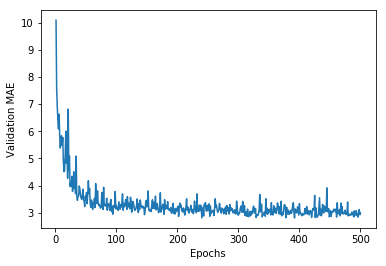

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Puede ser dificil ver la curva por la alta varianza. Por lo tanto vamos a suavizar la curva y omitir los 10 primeros datos (no aportan a la visualización del resultado)

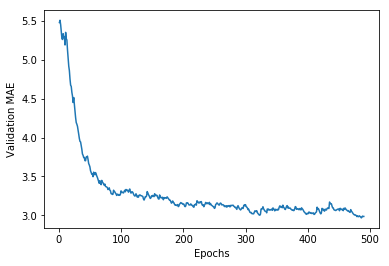

In [17]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Observando el gráfico, el resultado del MAE para validación no mejora significativamente después de 480 épocas. 

Generemos nuestro modelo final con la sintonización de estos parámetros. 


In [52]:
model = modelo_regresion() # compilar el modelo para generar uno nuevo

model.fit(train_data, train_targets,epochs=480, batch_size=16, verbose=1)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

Epoch 1/480
404/404 [==============================] - 1s 2ms/step - loss: 387.3126 - mean_absolute_error: 11.8274
Epoch 2/480
404/404 [==============================] - 0s 269us/step - loss: 108.5330 - mean_absolute_error: 8.1602
Epoch 3/480
404/404 [==============================] - 0s 257us/step - loss: 123.4912 - mean_absolute_error: 8.7523
Epoch 4/480
404/404 [==============================] - 0s 264us/step - loss: 120.9994 - mean_absolute_error: 8.1294
Epoch 5/480
404/404 [==============================] - 0s 259us/step - loss: 88.9189 - mean_absolute_error: 6.9348
Epoch 6/480
404/404 [==============================] - 0s 281us/step - loss: 102.2175 - mean_absolute_error: 7.7736
Epoch 7/480
404/404 [==============================] - 0s 281us/step - loss: 92.6313 - mean_absolute_error: 7.3130
Epoch 8/480
404/404 [==============================] - 0s 247us/step - loss: 96.5176 - mean_absolute_error: 7.4821
Epoch 9/480
404/404 [==============================] - 0s 262us/step - loss:

404/404 [==============================] - 0s 272us/step - loss: 18.8283 - mean_absolute_error: 3.1845
Epoch 142/480
404/404 [==============================] - 0s 269us/step - loss: 16.9156 - mean_absolute_error: 3.1111
Epoch 143/480
404/404 [==============================] - 0s 299us/step - loss: 15.2446 - mean_absolute_error: 2.9552
Epoch 144/480
404/404 [==============================] - 0s 242us/step - loss: 17.3078 - mean_absolute_error: 3.1625
Epoch 145/480
404/404 [==============================] - 0s 239us/step - loss: 15.5855 - mean_absolute_error: 3.0441
Epoch 146/480
404/404 [==============================] - 0s 237us/step - loss: 17.7456 - mean_absolute_error: 2.9848
Epoch 147/480
404/404 [==============================] - 0s 262us/step - loss: 18.5376 - mean_absolute_error: 3.1294
Epoch 148/480
404/404 [==============================] - 0s 237us/step - loss: 16.3881 - mean_absolute_error: 2.9933
Epoch 149/480
404/404 [==============================] - 0s 254us/step - loss:

404/404 [==============================] - 0s 244us/step - loss: 11.9678 - mean_absolute_error: 2.4556
Epoch 282/480
404/404 [==============================] - 0s 237us/step - loss: 10.2023 - mean_absolute_error: 2.3537
Epoch 283/480
404/404 [==============================] - 0s 239us/step - loss: 12.1390 - mean_absolute_error: 2.5019
Epoch 284/480
404/404 [==============================] - 0s 239us/step - loss: 11.2182 - mean_absolute_error: 2.5128
Epoch 285/480
404/404 [==============================] - 0s 247us/step - loss: 9.1363 - mean_absolute_error: 2.2917
Epoch 286/480
404/404 [==============================] - 0s 237us/step - loss: 11.2055 - mean_absolute_error: 2.4790
Epoch 287/480
404/404 [==============================] - 0s 242us/step - loss: 10.5446 - mean_absolute_error: 2.4555
Epoch 288/480
404/404 [==============================] - 0s 244us/step - loss: 9.7453 - mean_absolute_error: 2.2584
Epoch 289/480
404/404 [==============================] - 0s 247us/step - loss: 1

404/404 [==============================] - 0s 244us/step - loss: 8.5014 - mean_absolute_error: 2.0909
Epoch 422/480
404/404 [==============================] - 0s 242us/step - loss: 7.9122 - mean_absolute_error: 2.1267
Epoch 423/480
404/404 [==============================] - 0s 232us/step - loss: 9.8083 - mean_absolute_error: 2.2599
Epoch 424/480
404/404 [==============================] - 0s 242us/step - loss: 8.2165 - mean_absolute_error: 2.1603
Epoch 425/480
404/404 [==============================] - 0s 227us/step - loss: 9.7878 - mean_absolute_error: 2.2002
Epoch 426/480
404/404 [==============================] - 0s 244us/step - loss: 8.9879 - mean_absolute_error: 2.1320
Epoch 427/480
404/404 [==============================] - 0s 244us/step - loss: 7.5608 - mean_absolute_error: 2.0612
Epoch 428/480
404/404 [==============================] - 0s 252us/step - loss: 8.8957 - mean_absolute_error: 2.2200
Epoch 429/480
404/404 [==============================] - 0s 237us/step - loss: 7.8319 

Aun estamos sobre unos 3000 dolares ...

# Verificando los resultados de la red neuronal 

In [103]:
indice = np.random.choice(list(range(len(test_data))), 1)[0]
prediccion = model.predict(np.reshape(test_data[indice], [1, -1])) # model.predict(np.reshape(X[0], (1, 4))) es lo mismo
prediccion= prediccion[0] # bajar la dimensión vector-> numero
etiqueta_real = test_targets[indice]

print("Comparación de una predicción aleatoria")
print()
print("Valor de la etiqueta real:")
print(etiqueta_real)
print()
print("Valor de la predicción:")
print(prediccion[0])

Comparación de una predicción aleatoria

Valor de la etiqueta real:
25.0

Valor de la predicción:
25.352133


Text(0.5,1,'Gráfico de predicciones vs datos reales')

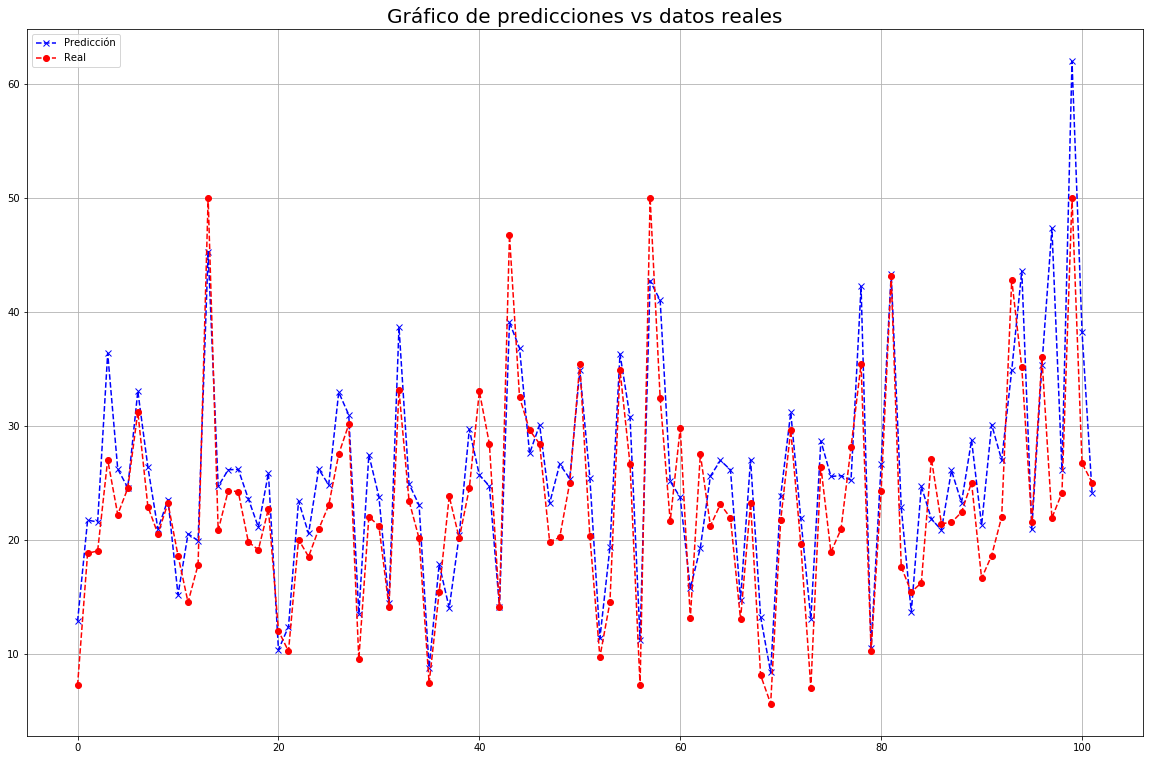

In [100]:
prediction = model.predict(test_data)
plt.figure(figsize=[20,13])
plt.plot(prediction,'b--x', label="Predicción")
plt.plot(test_targets, 'r--o', label="Real")
plt.grid()
plt.legend(loc='upper left')
plt.title("Gráfico de predicciones vs datos reales", fontsize = 20)